In [33]:
import random
import numpy as np
import pandas as pd
import time
import re
import datetime
import os
import matplotlib.pyplot as plt

In [34]:
dfDict = dict()
path = 'reuters/'
for file in os.listdir(path):
    if file[0] != '.':
        df = pd.read_excel(f'{path}{file}', index_col=0)  
        try:
            df['dateSeen'] = pd.to_datetime(df['dateSeen'], unit='s', utc=True).dt.tz_convert('America/New_York')
            dfDict[file] = df
        except:
            print(file)

In [35]:
dfDict.keys()

dict_keys(['cnn.com_07-14-2022_trial.xlsx', 'apnews.com_07-17-2022_trial.xlsx', 'en.interfax.com.ua_07-14-2022_trial.xlsx', 'foxnews.com_07-14-2022_trial.xlsx', 'themoscowtimes.com_07-14-2022_trial.xlsx', 'sputniknews.com_07-14-2022_trial.xlsx', 'plenglish.com_07-15-2022_trial.xlsx', 'reuters.com_07-15-2022_trial.xlsx', 'bbc.co.uk_07-15-2022_trial.xlsx', 'news.yahoo.com_07-15-2022_trial.xlsx', 'english.pravda.ru_07-14-2022_trial.xlsx', 'cbsnews.com_07-15-2022_trial.xlsx', 'tass.com_07-14-2022_trial.xlsx', 'rt.com_07-14-2022_trial.xlsx', 'en.people.cn_07-15-2022_trial.xlsx', 'punchng.com_07-15-2022_trial.xlsx'])

# Pre-war data summary 

In [41]:
dataCts = []
for outlet in dfDict:
    rec_total = 0
    records = dfDict[outlet].to_dict('records')
    char_total = 0
    word_total_estimate = 0
    for rec in records:
        if type(rec['text']) == str:
            dateSeen = rec['dateSeen'].tz_localize(None)
            if dateSeen <= pd.Timestamp(2022, 2, 23):
                rec_total += 1
                char_total += len(rec['text'])
                word_total_estimate += len(rec['text'].split(' '))
    # print(f'{outlet}: {"{:,}".format(rec_total)} total records. {"{:,}".format(word_total_estimate)} estimated total words for October 1 - Feb 23.')
    # print()
    dataCts.append({
        'outlet' : outlet.split('_')[0],
        'records' : rec_total
    })

In [42]:
dataCts

[{'outlet': 'cnn.com', 'records': 292},
 {'outlet': 'apnews.com', 'records': 1073},
 {'outlet': 'en.interfax.com.ua', 'records': 1775},
 {'outlet': 'foxnews.com', 'records': 688},
 {'outlet': 'themoscowtimes.com', 'records': 226},
 {'outlet': 'sputniknews.com', 'records': 1071},
 {'outlet': 'plenglish.com', 'records': 161},
 {'outlet': 'reuters.com', 'records': 489},
 {'outlet': 'bbc.co.uk', 'records': 342},
 {'outlet': 'news.yahoo.com', 'records': 531},
 {'outlet': 'english.pravda.ru', 'records': 116},
 {'outlet': 'cbsnews.com', 'records': 282},
 {'outlet': 'tass.com', 'records': 1755},
 {'outlet': 'rt.com', 'records': 315},
 {'outlet': 'en.people.cn', 'records': 91},
 {'outlet': 'punchng.com', 'records': 69}]

In [45]:
342+ 489 + 1073

1904

In [47]:
1071+1755

2826

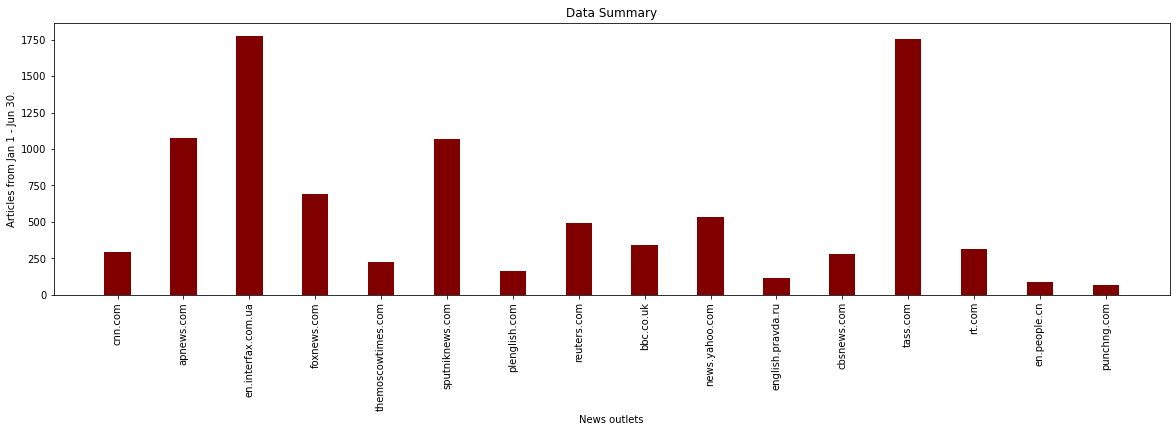

In [44]:

courses = [d['outlet'] for d in dataCts]
values = [d['records'] for d in dataCts]
  
fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("News outlets")
plt.xticks(rotation=90)
plt.ylabel("Articles from Jan 1 - Jun 30.")
plt.title("Data Summary")
plt.show()

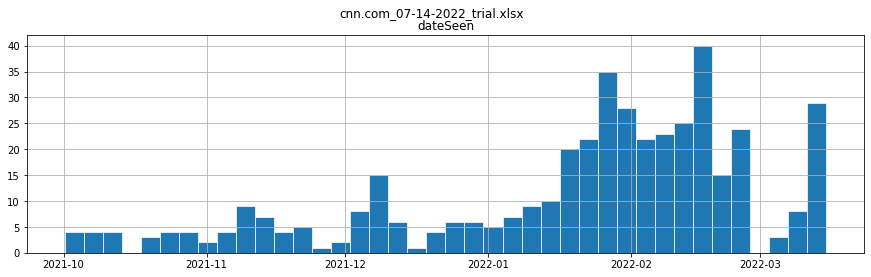

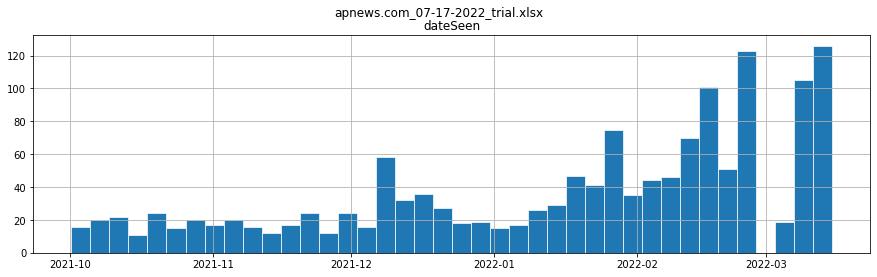

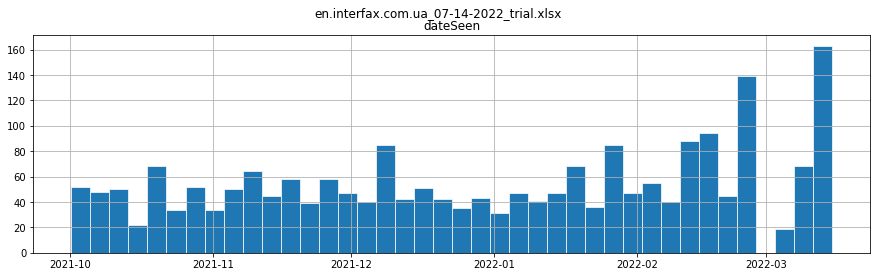

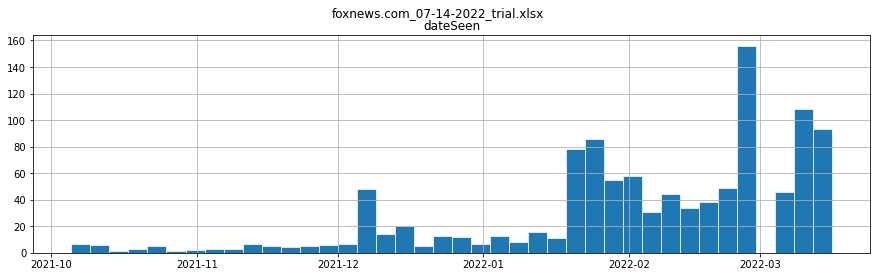

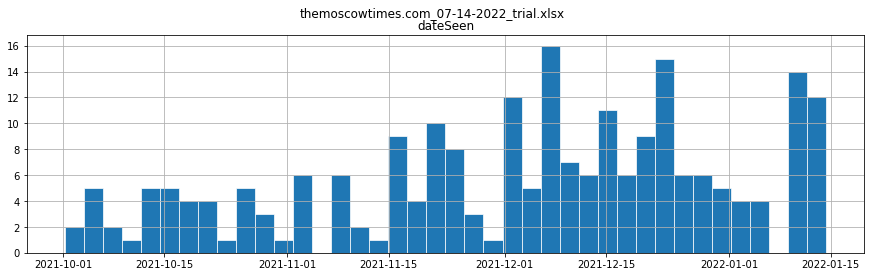

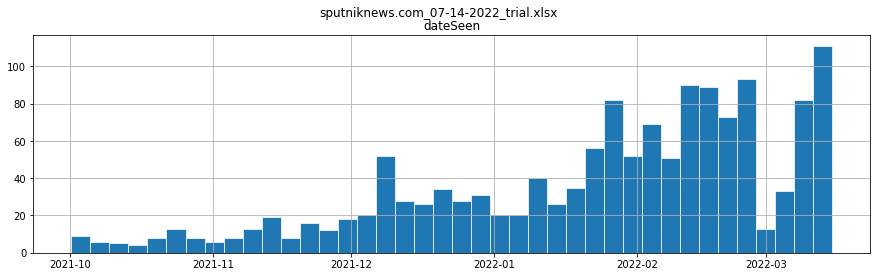

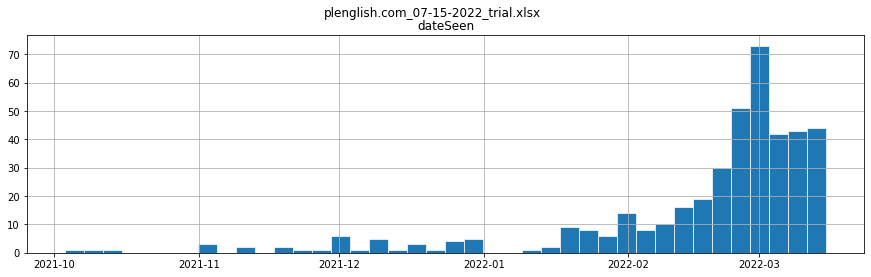

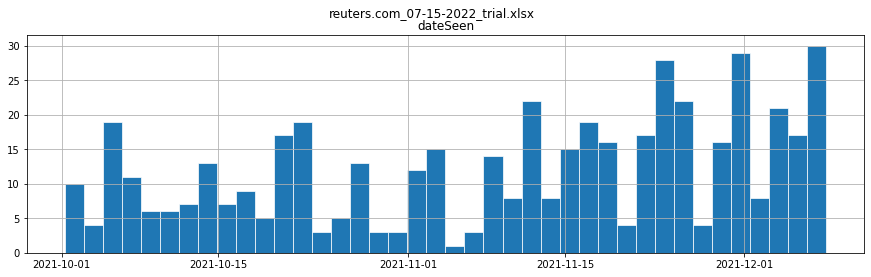

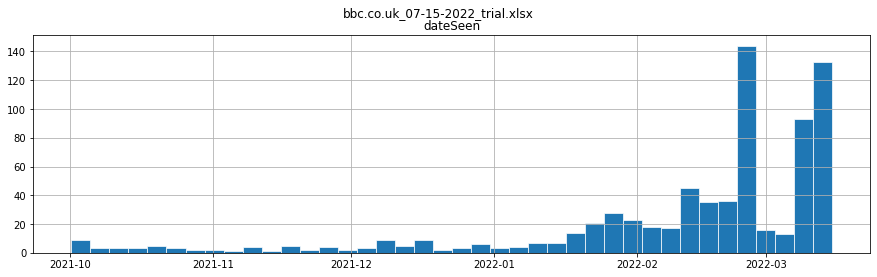

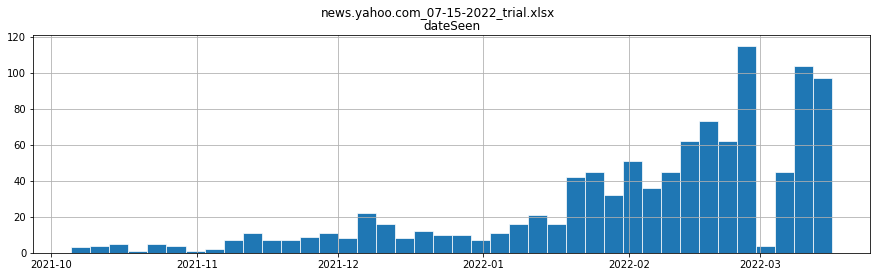

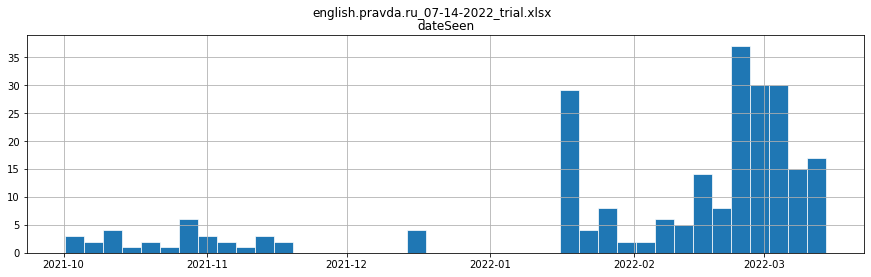

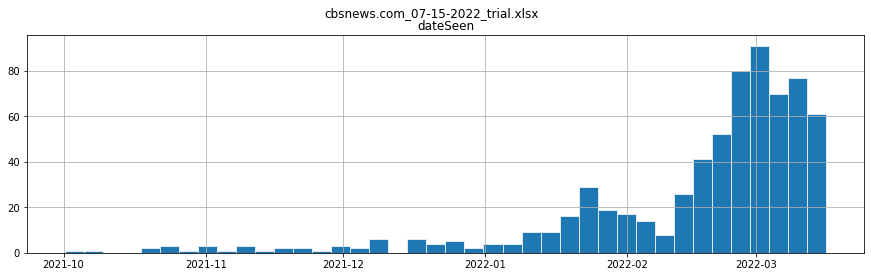

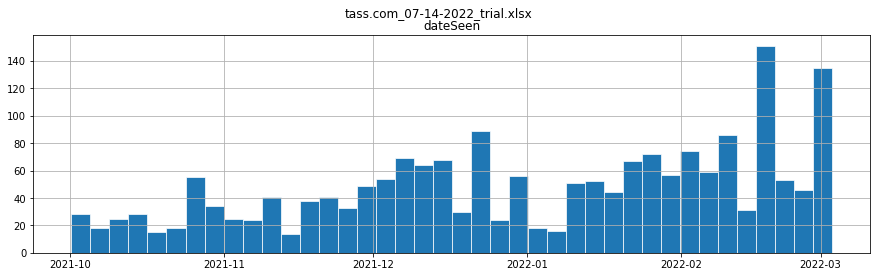

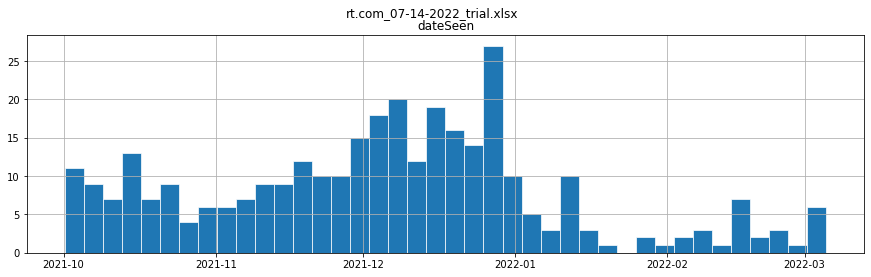

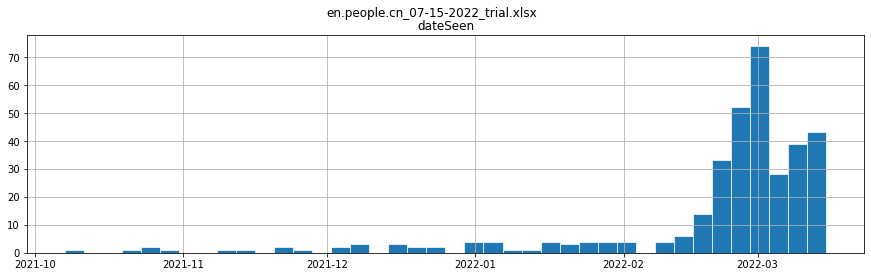

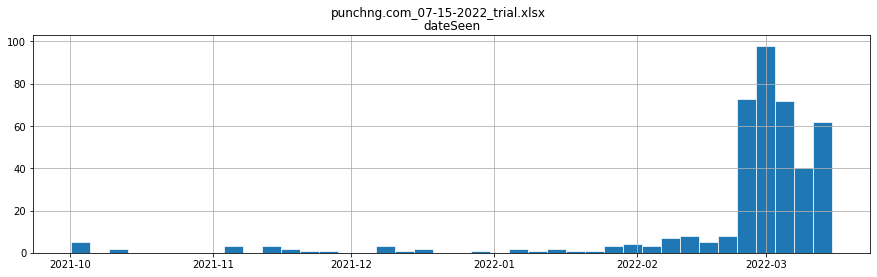

In [40]:
for outlet in dfDict:
    fig = plt.figure(figsize = (15,4))
    ax = fig.gca()
    hist = dfDict[outlet].hist(column='dateSeen', bins=40,edgecolor='white',linewidth=.7,ax=ax)
    plt.suptitle(outlet)

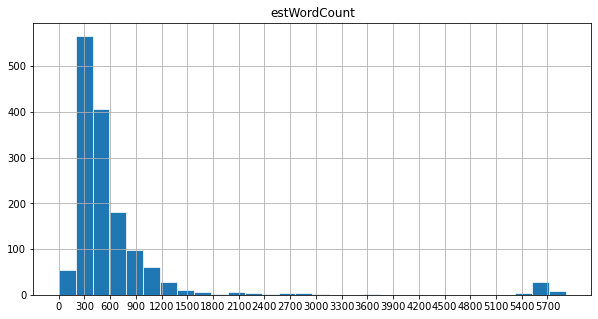

In [128]:
# Count words
def getWordCount(text):
    if type(text) == str:
        return len(text.split(' '))
    else:
        return 0

df = dfDict['foxnews.com_07-12-2022.xlsx']
df['estWordCount'] = df['text'].apply(getWordCount)

fig = plt.figure(figsize = (10,5))
ax = fig.gca()
ax.xaxis.set_ticks(list(range(0,6000,300)))  
hist = df.hist(column='estWordCount',bins=30,ax=ax,edgecolor='white',linewidth=.7)